# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple Cost Function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

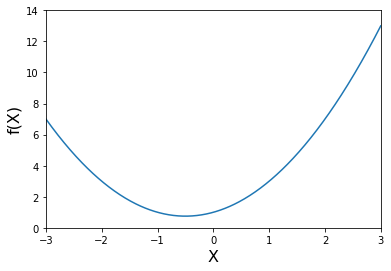

In [4]:
# Plot
plt.plot(x_1, f(x_1))
plt.xlim(-3, 3)
plt.ylim(0, 14)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)
plt.show()

## Slope & Derivatives

In [5]:
def df(x):
    return 2*x + 1

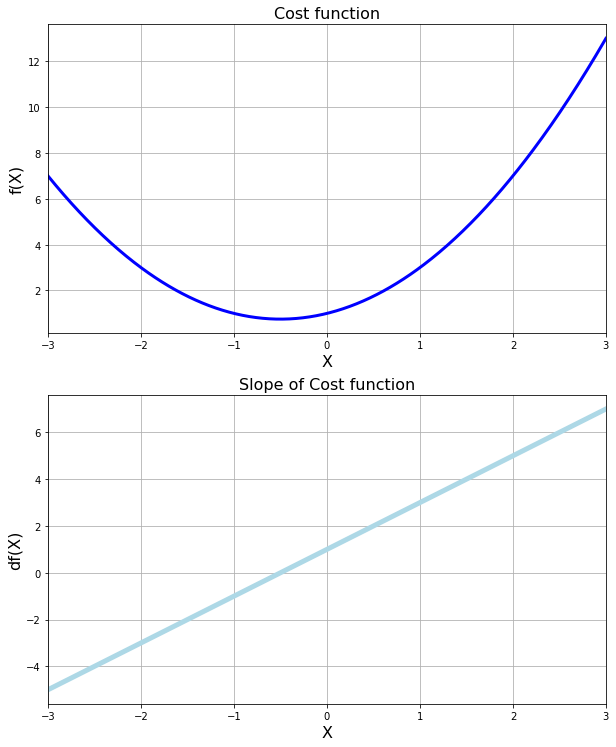

In [6]:
# Plot function and derivative

plt.figure(figsize=[10, 12.5])

# Chart 1: Cost function
plt.subplot(2, 1, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.xlim(-3, 3)
# plt.ylim(0, 14)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(2, 1, 2)
plt.plot(x_1, df(x_1), color='lightblue', linewidth=5)
plt.xlim(-3, 3)
# plt.ylim(-3, 5)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(X)', fontsize=16)
plt.grid()

plt.show()

## Python Loops & Gradient Descent

In [7]:
# Gradient descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Precision reached at step', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slop of df(x) at this pint is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Precision reached at step 61
Local minimum occurs at: -0.4999965672099885
Slop of df(x) at this pint is: 6.8655800230521535e-06
f(x) value or cost at this point is: 0.750000000011784


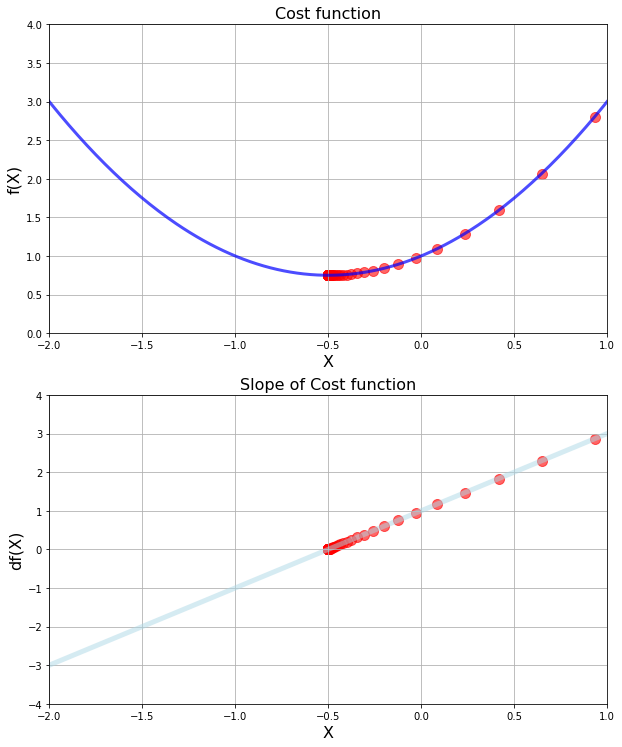

In [8]:
# Superimpose gradient descent with plots

plt.figure(figsize=[10, 12.5])

# Chart 1: Cost function and gradient descent
plt.subplot(2, 1, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.7)

values = np.array(x_list)
plt.scatter(values, f(values), color='red', s=100, alpha=0.6)

plt.xlim(-2, 1)
plt.ylim(0, 4)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(2, 1, 2)
plt.plot(x_1, df(x_1), color='lightblue', linewidth=5, alpha=0.5)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)
plt.xlim(-2, 1)
plt.ylim(-4, 4)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(X)', fontsize=16)
plt.grid()

plt.show()

# Example 2: Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [14]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

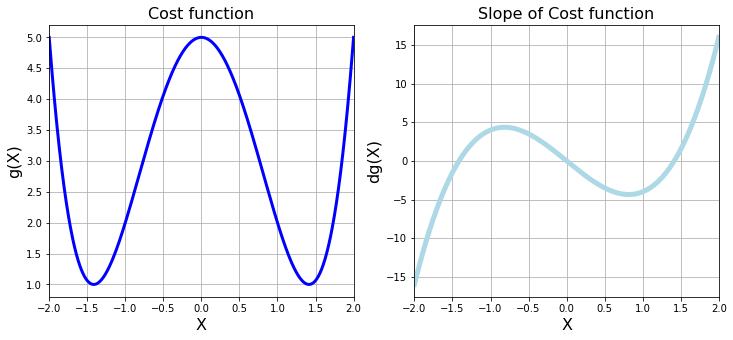

In [15]:
# Plot function and derivative side by side

plt.figure(figsize=[12, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.xlim(-2, 2)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='lightblue', linewidth=5)
plt.xlim(-2, 2)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(X)', fontsize=16)
plt.grid()

plt.show()

## Gradient Descent as a Pyhton Function

In [25]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.000001):
    '''Gradient descent method for finding local minima.'''
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
        
    return new_x, x_list, slope_list

In [20]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.000001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4142116468057846
Number of steps: 41


In [21]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,
                                                 initial_guess=-0.5,
                                                 multiplier=0.02,
                                                 precision=0.000001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4142116468057846
Number of steps: 41


In [24]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.414211502121664
Number of steps: 52


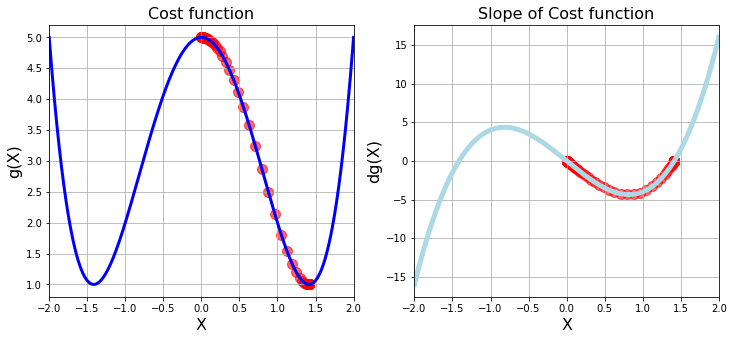

In [31]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.001)
# Try diffrent initial guess, namely: -2, -0.1, 0.1, 2
# Try with zero!

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[12, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
plt.xlim(-2, 2)
plt.title('Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(X)', fontsize=16)
plt.grid()

# Cart 2: Slope of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='lightblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.xlim(-2, 2)
plt.title('Slope of Cost function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(X)', fontsize=16)
plt.grid()

plt.show()